## <h1><center>Course: Introduction to Machine Learning</center></h1>
## <h1><center>Assigment 3 - Solutions</center></h1>
### <h1><center>Important NOTE: In order to get full grades, for every question, you need to provide the details of your work on how to get to a solution or the end of the proof</center></h1>
#### <h1><center>Instructor: Tan Bui-Thanh</center></h1>
#### <h1><center>TA: Hai Nguyen</center></h1>
##### <h1><center>Due day: 11:00 pm, Monday, 03 October, 2022 </center></h1>
#### If you gonna use this jupyter notebook for the assignment, please convert to .pdf file for submission. All submission must be in pdf format except codes.

## **Question 1** (Probability + random variables) (20+)

Consider $\Omega = [-2, 2]$ and define 
$$P[B \subset \Omega] := \int_{B} \frac{1}{4} d \omega, \text{ and thus }
P[d\omega] := \frac{1}{4} d \omega,
$$
that is the elementary event $\omega$ is the uniform random variable on $\Omega$.
Now, define $M(\omega)$ as: 
\begin{align}
    &M(\omega) =
    \begin{cases} 
        2 & \text{ if } \omega \geq 0\\
        0 & \text{ else }
    \end{cases}
\end{align}
$ \implies \text{ the state space is given by } S = \left\{ 0, 2 \right\}$. What is $E[M]$? What are $ \mu_M [M=2]$ and $ \mu_M [M=0]$?



## **Question 2** (Monte-Carlo approximation) (30+)

1. Write a Python program to estimate pi using Monte-Carlo approximation. Report a number of samples that allow you to obtain 2 digits of accuracy for pi. Hint: Drawing independently $x^i$, $x^i$ fron uniform distribution $\mathcal{U}[0,1]$. Probability of points inside the circile of radius of 1 is $\pi/4$.

2. Notice that using elementary calculus the area of the first quarter of or a disk of radius $1$ can also be computed as
$$ \frac{\pi}{4} = \int_0^1 \sqrt{1-x^2} dx = E[\sqrt{1-X^2}]$$
where X is the uniform random variable U [0, 1]. Describe how you are going to use the Monte-Carlo to estimate $\pi/4$ in this case. Write a Python code to estimate π. Report a number of samples that allow you to obtain 2 digits of accuracy for $\pi$.

3. Compare to the preceding methods, which approach converges faster (i.e. you get a smaller N)? Explain your answer. 

Hint: use need to run a few hunreds of random seed cases and for each random seed drawing about 10000 samples. Then, compute the expectation (average over random seed cases the estimated $\pi$) and variance of each method. from that you can explain correctly. 



<br>
<b> Question 1 </b>

Given $\Omega = [-2, 2]$  
$$P[B \subset \Omega] := \int_{B} \frac{1}{4} d \omega, \text{ }
P[d\omega] := \frac{1}{4} d \omega,
$$

The elementary event $\omega$ is the uniform random variable on $\Omega$.

Now, 
\begin{align}
    &M(\omega) =
    \begin{cases} 
        2 & \text{ if } \omega \geq 0\\
        0 & \text{ else }
    \end{cases}
\end{align}
$ \implies \text{ the state space is given by } S = \left\{ 0, 2 \right\}$. 

<br>

To find: $E[M]$

We know that, $$E[M] = \int_S m \mu_M (dm) = \int_\Omega M(\omega) P[d\omega] $$
$$ \implies E[M] = \int_\Omega M(\omega) \frac{1}{4} d \omega $$
$$  \implies E[M] = \int_0^2 2 \frac{1}{4} d\omega $$
$$  \implies E[M] = 1 $$

Now, to find $ \mu_M [M=2]$ and $ \mu_M [M=0]$

<br>
We know, for any random variable $A$

$$\mu_M[A] = P[B] \implies B = M ^ {-1} [A] \implies M[B] = A $$

<br>

For $M = 2$, $B = (0,2]$
Therefore, 

$$P[B] = \int_0^2 \frac{1}{4}d\omega = \frac{1}{2}$$
$$ \implies \mu_M[M=2] = \frac{1}{2}$$

<br>

For $M = 02$, $B = [-2,0)$
Therefore, 
$$P[B] = \int_{-2}^0 \frac{1}{4}d\omega = \frac{1}{2}$$
$$ \implies \mu_M[M=0] = \frac{1}{2}$$

<br>

<b> Question 2 </b>
1. For Monte Carlo approximation of $\pi$, we sample a set number of points in a square of side 1, and check the probability of them lying inside a quarter circle of radius 1 wtih its center at $[0,0]$

In [1]:
import numpy as np
 
 
# Maximum number of samples to consider
MaxTrials = 10000
radius = 1
i = 1

while(i<MaxTrials):
  In = 0
  # Generate points in a square of side 1 units, from 0 to 1.
  X_r = np.random.default_rng().uniform(0, 1, (i,))
  Y_r = np.random.default_rng().uniform(0, 1, (i,))

  for j in range(i):
    x = X_r[j]
    y = Y_r[j]
    # Check if the points are inside the quarter circle or not
    if x**2+y**2<=radius**2:
        In = In + 1
  
  pi = 4*In/i
  # If the approximation reaches 2 digit accuracy, break loop
  if (3.140 <= pi <= 3.149):
    break
  i+=1

# Displaying upto two decimal places
print("Value of Pi:", '%.2f' %pi)  
print("This approximation took " + str(i) + " samples.")

Value of Pi: 3.14
This approximation took 70 samples.


2. For the second approach, 
$$ \frac{\pi}{4} = \int_0^1 \sqrt{1-x^2} dx = E[\sqrt{1-X^2}]$$
<br>
where X is the uniform random variable $U [0, 1] $

So, to approximate $\pi$ we take $n$ samples of $ X\subseteq U [0, 1]$

We know that the expectation of a discrete function is the mean of the calculated values of the function. 

Since $X$ is discrete, we can write

$$E(\sqrt[2]{1 - X^2} = mean ( 1- X^2) $$

As the number of samples increases, this value reaches closer and closer to the integral value of the function. 

Thus we can use Monte Carlo approximation to calculate $\pi$ using this integral. 

In [3]:
import numpy as np
 
 
# Maximum number of samples to consider
MaxTrials = 10000
radius = 1
i = 1

while(i<MaxTrials):
  # Generate points from uniform distribution in range [0, 1]
  X_r = np.random.default_rng().uniform(0, 1, (i,))
  Sum = np.sqrt(1 - X_r**2)
  Exp_area = np.mean(Sum)
  Pi = 4*Exp_area
  # If the approximation reaches 2 digit accuracy, break loop
  if (3.140 <= Pi <= 3.149):
    break
  i+=1

# Displaying upto two decimal places
print("Value of Pi:", '%.2f' %Pi)
print("This calculation took " + str(i) + " samples.")

Value of Pi: 3.14
This calculation took 43 samples.


3. To test which approach converges faster, we calculate mean and variance of both approache for a 1000 random seed cases drawing 10000 samples.

In [5]:
# For Approach 1

nSeedcases = 1000
area = []

for j in range(nSeedcases):
  nTrials = 10000
  radius = 1
  # Counter for thepoints inside the circle
  In = 0
 
  # Generate points in a square of side 2 units, from 0 to 1.
  X_r = np.random.default_rng().uniform(0, 1, (nTrials,))
  Y_r = np.random.default_rng().uniform(0, 1, (nTrials,))
 
  for i in range(nTrials):
    x = X_r[i]
    y = Y_r[i]
    # Check if the points are inside the circle or not
    if x**2+y**2<=radius**2:
        In = In + 1
  area.append(4*In/nTrials)

Exp_pi = np.mean(area)
var_pi = np.var(area)

print("Expected Pi: ",Exp_pi)
print("Variance: ",var_pi)

Expected Pi:  3.1418616000000004
Variance:  0.00027679812544


In [6]:
# For Approach 2

nSeedcases = 1000
Pi = []

for j in range(nSeedcases):
  nTrials = 10000
  radius = 1

  # Generate points from uniform distribution in range [0, 1] 
  X_r = np.random.default_rng().uniform(0, 1, (nTrials,))
 
  Sum = np.sqrt(1 - X_r**2)

  Exp_area = np.mean(Sum)
  Pi.append(4*Exp_area) 

Exp_pi = np.mean(Pi)
var_pi = np.var(Pi)

print("Expected Pi: ",Exp_pi)
print("Variance: ",var_pi)

Expected Pi:  3.1416285692583417
Variance:  7.371435704829155e-05


We can see that variance of method 2 is much less than that of method 1. 

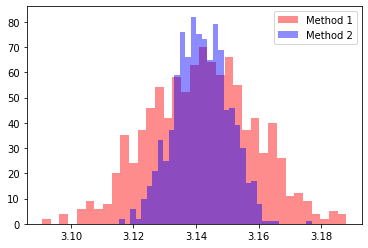

In [7]:
import matplotlib.pyplot as plt

plt.hist(area,bins = 35, alpha = 0.45, color = 'red', label = "Method 1")
plt.hist(Pi,bins = 35, alpha = 0.45, color = 'blue', label = "Method 2")
plt.legend()
plt.show()

Plotting the distribution of calculated $\pi$ from both methods also gives us a similar story. It is clearly seen that method 2 has much lower variance than method 1, and also more of the random initializations seem to converge at 3.14. Thus method 2 is more likely to converge to the true value of $\pi$ using a smaller sample number. 

## **Question 3** (Probabilistic regression) (50+)

1.) Consider $y = f(x) = a_4x^4 + a_3x^3 + a_2x^2 + a_1x + a_0$, and you pick $(a_0,a_1,a_2, a_3, a_4)$ (See Homework 2 problem 1 as a reference). First, you generate some N (you pick N) noisy data samples by
- Draw gaussian samples $x^i \sim \mathcal{N}(0, 2)$
- Generate noisy y, i.e., $y^i = f(x^i) + \epsilon$, where $\epsilon \sim \mathcal{N}(0, \delta^2)$, and you pick small noise level $\delta$

2.a) Similar to the Lecture 5.b, but now choose the Gaussian likelihood model with polynomial regression of order $10$ for conditional distribution of $y$ given $x$ and $\theta$
$$p(y | x; \theta).$$
Here we choose $\sigma = \delta$. From N samples $(x^i, y^i)$, derive the optimal $\theta^*$ by the maximum conditional likelihood function approach.

2.b) Determine the mean of conditional distribution $p(y | x; \theta^*)$
as function of x and then plotting this mean together with the training data.

2.c) Find the variance of conditional distribution $$p(y | x; \theta^*)$$
Then, plot ($y \pm \sigma$) curve on top of your figure in 2.b).

2.d) This question is for gererating the testing data and plotting them. Draw $x^i \sim \mathcal{N}(0, 2)$, for $i=1,...,50$, and then compute $y^i = f_{\theta^*}(x^i) + \epsilon$. Plotting these 50 pairs $(x^i, y^i)$ in the same figure. What is the percentage of points that are within the uncertainty band? Discuss the result.

3.a) From N samples $(x^i, y^i)$, finding the optimal $\theta^*$ by optimizing the model using the MAP approach (see Lecture 5b and you need to derive MAP function). The variance for prior Gaussian distribution of $\theta$ should be a reasonable value (it has the same meaning as the regularization parameter)

3.b.c.d) reapeating steps 2.b.c.d, then discuss the difference. 


<br>

<b> Question 3 </b>

1) Generating data:

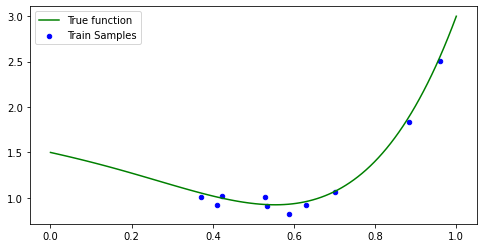

In [88]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]
import pandas as pd
from sklearn import datasets
np.random.seed(0)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso, LogisticRegression

from scipy.stats import truncnorm

# Defining function to generate gaussian samples of a given mean and standard deviation within a specified range for ease of visualization.
def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

order_true = 5

# Define coefficients of true function
true_coefficient = np.array([.5, -1, -.5, -2, 5])

# Define polynomial
def true_y(X):
  f = np.ones((X.shape))
  for i in range(order_true):
    f += true_coefficient[i] * X**i
  return f

N = 10
# Generate noisy X Data
X_i = get_truncated_normal(mean=0, sd=2, low=0, upp=1).rvs(N)
np.random.seed(2)
# Generate noisy Y Data with chosen standard deviation = 0.05
# Thus variance is 0.0025
noise = 0.05
Y_i = true_y(X_i) + np.random.normal(0, noise, N)

# Visualize true function and generate samples
plt.scatter(X_i,Y_i, edgecolor='b', s=20, facecolor = 'b', label="Train Samples")
X_test = np.linspace(0., 1., 100)
plt.plot(X_test,true_y(X_test),'g',label = 'True function')
plt.legend()

2. a) First, we define our polynomial function as a function of $\theta$ and feature vector $x$ where,

$$ \theta = \begin{bmatrix} \theta_0 & \theta_1 & \theta_2 & ... & \theta_{10}\end{bmatrix}$$

and 

$$ x = \begin{bmatrix} 1 & x^1 & x^2 & ... & x^{10}\end{bmatrix}$$

such that, 
$$ f_\theta(x) = \theta^\top x' $$

In [89]:
# Define polynomial model of degree 10, which returns the predicted y value
# This function has 11 theta parameters to optimize
degree = 10

def polynomial_function(x, theta):
    yPred = theta[0]
    for i in range(degree):
      yPred = yPred + theta[i+1]*x**(i+1)
    return yPred

Since we are choosing the Gaussian likelihood model, we define 

$$ p(y|x, \theta) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{(y - \theta^\top x)^2}{2 \sigma^2} \right).$$

We optimize the model using maximum likelihood. The log-likelihood function at a point $(x,y)$ equals:

\begin{align*}
\log L(\theta) = \log p(y| x, \theta) & = \log \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{(y - \theta^\top x)^2}{2 \sigma^2} \right) \\
& = -\frac{(y - \theta^\top x)^2}{2 \sigma^2} + \text{const.}
\end{align*}

As specified in the question, we are taking $\sigma = \delta = 0.05$

In [90]:
# Define Log Likelihood function
def calcLogLikelihood(pred, true):
    error = true-pred
    # As specified in question we take sigma as the defined noise
    sigma = noise
    # Using simplified form of Log Likelihood, which is equivalent to MSE
    # Dropping the constant term as it is not required for minimization
    f = -1*(np.dot(error.T,error))/(2*sigma)  
    return f

In [91]:
# Maximizing log likelihood is equivalent to minimizing the negative of log likelihood
def MLEFunction(theta):
    x = X_i
    y = Y_i
    yPred = polynomial_function(x, theta)
    f = calcLogLikelihood(yPred, y)
    return (-1*f)

In [92]:
# n degree polynomial has n+1 parameters to optimize
ntheta = degree + 1
# Initialize theta vector to [0, 0, ... 0]
theta = np.zeros(ntheta)

from scipy.optimize import minimize
res = minimize(MLEFunction, theta, method='BFGS', options={'disp': True})

         Current function value: 0.147683
         Iterations: 73
         Function evaluations: 1222
         Gradient evaluations: 101


In [93]:
print("The optimal theta values thus are: ", res.x)

The optimal theta values thus are:  [  38.53265119 -299.4135045   802.31811605 -615.4936481  -518.90969326
  385.5637676   689.76084072  141.7629806  -597.51906736 -649.46122181
  627.61492226]


2.b) We know that the mean of $p(y|x;\theta^*)$ as a function of $x$ is given by $\mu_{y|x}(x) = \theta^{*\top} x$.

This can be confirmed by looking at the form of the standard normal distribution: 
$$f(x) = \frac{1}{\sqrt[]{2\pi}\sigma}\exp\left(-\frac{(y - u_y)^2}{2\sigma^2}\right) $$

and comparing with our Gaussian model: 

$$ p(y|x, \theta) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{(y - \theta^\top x)^2}{2 \sigma^2} \right).$$

In our case, since it is polynomial regression we replace $x$ with the feature vector: 
$$ x' = \begin{bmatrix} 1 & x^1 & x^2 & ... & x^{10}\end{bmatrix}$$
<br>
Plotting this calculated mean together with the training data:

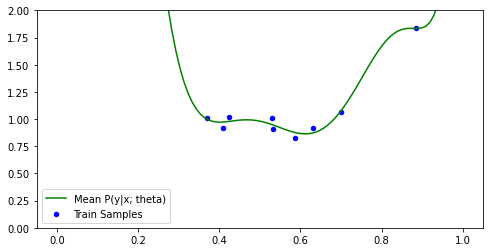

In [94]:
theta_opt = res.x

X_test = np.linspace(0., 1., 100)
# Finding mean of p(y|x, theta) as a function of x using the function we defined earlier
Y_mean = polynomial_function(X_test, theta_opt)
plt.plot(X_test,Y_mean,'g',label = 'Mean P(y|x; theta)')
plt.scatter(X_i,Y_i, edgecolor='b', s=20, facecolor = 'b', label="Train Samples")
plt.ylim((-0.,2))
plt.legend()

2.c) For determining the variance of the conditional distribution, we observe the standard form and our Gaussian model. This tells us that $\sigma$ is the standard deviation. 

Since we have already defined $\sigma = 0.05$, the variance is $\sigma^2 = 0.0025$

We plot ($y \pm \sigma$) curve over the previous plot.

In [95]:
# Defining probability density function P(y|x, theta)
import scipy.stats

def p(y, x, theta):
  sigma = 0.05
  error = y - polynomial_function(x, theta)
  return  (np.sqrt(1.0/(2.0*np.pi*sigma**2)))*np.exp(-1*((np.dot(error.T,error))/(2*sigma**2)))

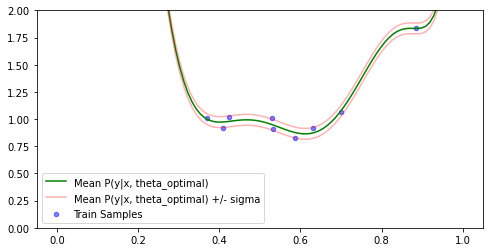

In [96]:
#variance = np.var(Y_i - polynomial_function(X_i, theta_opt))
#print("Empirical variance: ",variance)
# variance = sigma^2
sigma = 0.05
variance = sigma**2

X_test = np.linspace(0., 1., 100)
Y_mean = polynomial_function(X_test, theta_opt)
plt.plot(X_test,Y_mean,'g',label = 'Mean P(y|x, theta_optimal)')
plt.plot(X_test,Y_mean + sigma,'r', alpha=0.3, label = "Mean P(y|x, theta_optimal) +/- sigma")
plt.plot(X_test,Y_mean - sigma,'r', alpha=0.3)
plt.scatter(X_i,Y_i, edgecolor='b', s=20, facecolor = 'b', label="Train Samples", alpha = 0.5)
plt.ylim((-0.,2))
plt.legend()




2.d) Now generating testing data in the form:

$$x^i \sim \mathcal{N}(0, 2)\;\;:\;\; i=1,...,50$$

$$y^i = f(x^i) + \epsilon$$

and plotting together with ($y \pm \sigma$)

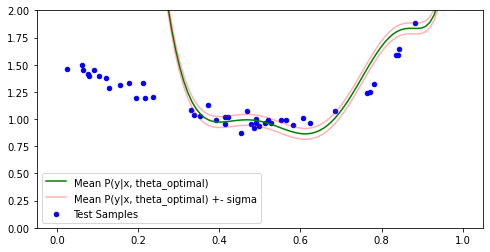

In [97]:
N = 50
# X Data
X_i_test = get_truncated_normal(mean=0, sd=2, low=0, upp=1).rvs(N)
np.random.seed(10)
# Y Data
Y_i_test = true_y(X_i_test)+ np.random.normal(0, 0.05, N) # Chosen standard deviation = 0.05

plt.scatter(X_i_test,Y_i_test, edgecolor='b', s=20, facecolor = 'b', label="Test Samples")
plt.plot(X_test,Y_mean,'g',label = 'Mean P(y|x, theta_optimal)')
plt.plot(X_test,Y_mean + sigma,'r', alpha=0.3, label = "Mean P(y|x, theta_optimal) +- sigma")
plt.plot(X_test,Y_mean - sigma,'r', alpha=0.3)
plt.ylim((-0.,2))
plt.legend()


Overfitting => need regularization

3.a) Maximum A Priori (MAP) Approach:

In MAP learning, we optimize the following objective.
\begin{align*}
\theta_\text{MAP} = \arg\max_\theta \left( \log \prod_{i=1}^n P(x^{(i)}, y^{(i)} \mid \theta) + \log P(\theta) \right),
\end{align*}

To reach this objective, 

1. We assume the same Gaussian likelihood model as the previous part for our data:
$$ p(y| x,\theta) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{(y - \theta^\top x)^2}{2 \sigma^2} \right).$$

2.  We assume a Gaussian prior with mean zero and variance $\tau$ on the parameters $\theta$:
$$ p(\theta) = \prod_{j=1}^d \frac{1}{\sqrt{2\pi}\tau} \exp\left( -\frac{\theta_j^2}{2\tau^2} \right)$$

3. The log likelihood function then becomes: 
\begin{align*}
\log L(\theta) & = \log p(y| x, \theta) + \log p(\theta) 
\\ & = \log \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{(y - \theta^\top x)^2}{2 \sigma^2} \right) + \log \prod_{j=1}^d \frac{1}{\sqrt{2\pi}\tau} \exp\left( -\frac{\theta_j^2}{2\tau^2} \right) \\
& = -\frac{(y - \theta^\top x)^2}{2 \sigma^2} - \frac{1}{2\tau^2}\sum_{j=1}^d \theta_j^2 + \text{const.} \\
& = Objective_{MLE} - \frac{1}{2\tau^2}\sum_{j=1}^d \theta_j^2 + const.
\end{align*}



Thus, the MAP approach is equivalent to performing Ridge Regression with regularization parameter $\lambda$ = $1/\tau^2$

In [99]:
# Defining objective function for MAP
tau = 100

def MAPFunction(theta):
    x = X_i
    y = Y_i
    yGuess = polynomial_function(x, theta)
    # Adding Gaussian prior term to MLE objective function
    f = calcLogLikelihood(yGuess, y) - 0.5/tau*np.linalg.norm(theta)**2
    return (-1*f)

In [100]:
ntheta = degree + 1
theta = np.zeros(ntheta)

from scipy.optimize import minimize
res = minimize(MAPFunction, theta, method='BFGS', options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.281319
         Iterations: 27
         Function evaluations: 348
         Gradient evaluations: 29


In [101]:
print("The optimal theta values thus are: ", res.x)

The optimal theta values thus are:  [ 1.32340904 -0.69378059 -0.60854564  0.07684185  0.65408144  0.91474257
  0.87995001  0.64353811  0.30049655 -0.07730079 -0.44383261]


3.b) Similar to previous case, the mean of $p(y|x;\theta^*)$ as a function of $x$ is given by $\mu_{y|x}(x) = \theta^{*\top} x$.

Plotting this calculated mean together with the training data:

(-0.0, 2.0)

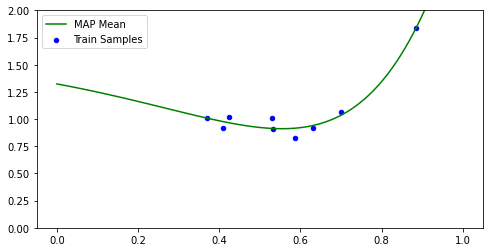

In [106]:
theta_opt_MAP = res.x

X_test = np.linspace(0., 1., 100)
Y_mean = polynomial_function(X_test, theta_opt_MAP)
plt.plot(X_test,Y_mean,'g',label = 'MAP Mean')
plt.scatter(X_i,Y_i, edgecolor='b', s=20, facecolor = 'b', label="Train Samples")
plt.legend()
plt.ylim((-0.,2))

3.c) For determining the variance of the conditional distribution, we recall that the conditional probability function of y is given by:

$$ P(y,x,\theta) = P(y, x | \theta)P(\theta)$$

where, 

$$ p(y, x | \theta) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{(y - \theta^\top x)^2}{2 \sigma^2} \right).$$

$$ p(\theta) = \prod_{j=1}^d \frac{1}{\sqrt{2\pi}\tau} \exp\left( -\frac{\theta_j^2}{2\tau^2} \right).$$

$$ p(y, x, \theta) = \frac{1}{\sqrt{2\pi}\sigma} \left(\frac{1}{\sqrt{2\pi}\tau}\right)^d \exp\left( -\frac{(y - \theta^\top x)^2}{2 \sigma^2} - \frac{1}{2\tau^2}\sum_{j=1}^d \theta_j^2\right)$$


Once the model is trained, $\theta$ is constant. Thus the norm of $\theta$ will not affect the variance of the Gaussian ditribution. 

Therefore, $\sigma = \delta = 0.05$, which is the noise level we selected earlier.
<br><br>

We plot ($y \pm \sigma$) curve over the previous plot.

0.0025454220624674855


(-0.0, 2.0)

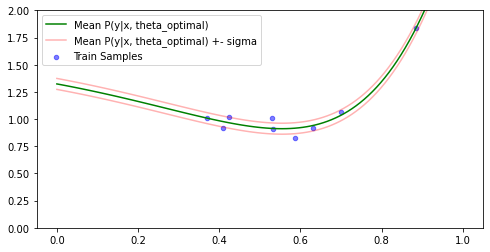

In [108]:
variance = np.var(Y_i - polynomial_function(X_i, theta_opt_MAP))
print(variance)
# variance = sigma^2
sigma = np.sqrt(variance)
X_test = np.linspace(0., 1., 100)
Y_mean = polynomial_function(X_test, theta_opt_MAP)
plt.plot(X_test,Y_mean,'g',label = 'Mean P(y|x, theta_optimal)')
plt.plot(X_test,Y_mean + sigma,'r', alpha=0.3, label = "Mean P(y|x, theta_optimal) +- sigma")
plt.plot(X_test,Y_mean - sigma,'r', alpha=0.3)
plt.scatter(X_i,Y_i, edgecolor='b', s=20, facecolor = 'b', label="Train Samples", alpha = 0.5)
plt.legend()
plt.ylim((-0.,2))


2.d) Now using the resting data in the form:

$$x^i \sim \mathcal{N}(0, 2)\;\;:\;\; i=1,...,50$$

$$y^i = f(x^i) + \epsilon$$

that we generated for the previous ase, and plotting together with ($y \pm \sigma$)

(-0.0, 2.0)

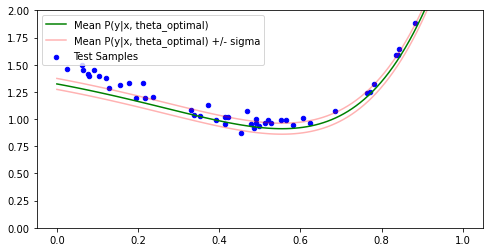

In [110]:
#Using the same testing samples we generated earlier - X_i_test, Y_i_test

plt.scatter(X_i_test,Y_i_test, edgecolor='b', s=20, facecolor = 'b', label="Test Samples")
plt.plot(X_test,Y_mean,'g',label = 'Mean P(y|x, theta_optimal)')
plt.plot(X_test,Y_mean + sigma,'r', alpha=0.3, label = "Mean P(y|x, theta_optimal) +/- sigma")
plt.plot(X_test,Y_mean - sigma,'r', alpha=0.3)
plt.legend()
plt.ylim((-0.,2))


In [111]:
count = 0

for i in range(N):
  if ((Y_i_test[i] <= (polynomial_function(X_i_test[i], theta_opt_MAP) + sigma)) and (polynomial_function(X_i_test[i], theta_opt_MAP) >= (Y_mean[i] - sigma))):
    count = count + 1

percentage = count/N*100
print("Percentage of points within the uncertainty band: " + str(percentage) + "%")

Percentage of points within the uncertainty band: 24.0%


Now, model is good, thanks to regularization. However, the uncertainty band does not make sense, since it should give less uncertainty at training points. You will see it in assingment 4.